In [1]:
#Import relevant packages
import matplotlib.pyplot as plt
import numpy as np
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#load data filepaths into separate lists
cardboard_files = glob.glob("Cardboard/*.s2p")
metal_files = glob.glob("Metal/*.s2p")
plastic_files = glob.glob("Plastic/*.s2p")

#Load outlier datapoint for demonstration purposes
outlier = np.loadtxt("test/Co0s0_outlier.s2p")

In [5]:
#A method for counting the number of scans taken from each unique object in the dataset
#Returns a list of integers which correspond to the number of items for that specific object
def count_scans(filenames):
    counts = []
    
    #Loop through unique objects and match by filename
    for i in range(35):
        x = sum(1 for name in filenames if name.__contains__(f'o{i}s'))
        
        #If a non-zero number of scans were counted, add the count to list
        if x != 0:
            counts.append(x)
    return counts

In [7]:
#Count general statistics for cardboard objects
c_scans=count_scans(cardboard_files)
print(c_scans)
print(len(c_scans))
print(np.mean(c_scans))
np.median(c_scans)

[9, 17, 13, 22, 15, 10, 9, 14, 11, 16, 5, 12, 11, 11, 15, 20, 13, 12, 11, 10, 9, 10, 8, 9, 15, 15, 10, 14, 12, 6]
12.133333333333333


11.5

In [9]:
#Count general statistics for plastic objects
p_scans=count_scans(plastic_files)
print(p_scans)
print(len(p_scans))
print(np.mean(p_scans))
np.median(p_scans)

[10, 7, 11, 17, 14, 10, 10, 11, 10, 8, 15, 11, 11, 15, 11, 11, 11, 8, 10, 13, 10, 13, 16, 15, 7, 10, 12, 14, 11, 11, 16, 9, 7]
11.363636363636363


11.0

In [11]:
#Count general statistics for metal objects
m_scans=count_scans(metal_files)
print(m_scans)
print(len(m_scans))
print(np.mean(m_scans))
np.median(m_scans)

[14, 14, 7, 10, 11, 7, 15, 12, 10, 12, 10, 10, 10, 12, 13, 9, 12, 12, 11, 12, 11, 12, 12, 13, 6, 11, 12, 8, 12, 8, 10, 12, 11, 12]
10.970588235294118


11.5

In [13]:
#Find overall median and mean of the number of scans per object
print(np.mean(c_scans+p_scans+m_scans))
print(np.median(c_scans+p_scans+m_scans))

11.463917525773196
11.0


In [15]:
#A method for initializing the dataset
def dataset(filepaths):
    dataset = np.empty((len(filepaths), 101, 5))
    for index, file in enumerate(filepaths):
        data = np.loadtxt(file, skiprows = 1, usecols = (0,1,2,3,4))
        dataset[index] = data
    return dataset

In [17]:
#Initialize the dataset of each class individually for easier plotting
cardboard_data = dataset(cardboard_files)
metal_data = dataset(metal_files)
plastic_data = dataset(plastic_files)

#Check shape
print(cardboard_data.shape)
print(metal_data.shape)
print(plastic_data.shape)

(364, 101, 5)
(373, 101, 5)
(375, 101, 5)


In [19]:
#Create a combined dataset and check number of samples
data = np.concatenate((cardboard_data, metal_data, plastic_data))
len(data)

1112

In [11]:
#Find the minimum and maximum y-axix values in the dataset in order to standardize
#gridplot axis for easier comparison between individual plots
ymax = np.max(data[:,:,1:])
ymin = np.min(data[:,:,1:])
print(ymax)
print(ymin)

0.032363
-0.142327


In [12]:
#A method for plotting each unique object's scans in a grid
def create_Sparam_gridplot(dataset, filenames, n_objects, S_param, color, ymin, ymax, title, ylabel):
    fig = plt.figure()
    
    #Calculate the number of rows required for the gridplot and set figure size
    gridsize = -(n_objects//-6)
    fig.set_figheight(2.5*gridsize)
    fig.set_figwidth(15)
    
    #for each unique object add new subplot, set y axis min and max and plot each scan associated with that object
    for i in range(n_objects):
        plot = fig.add_subplot(gridsize, 6,i+1)
        ax = plt.gca()
        ax.set_ylim([ymin, ymax])
        for name, file in zip(filenames, dataset):
            if name.__contains__(f'o{i}s'):
                plt.plot(file[:, 0], file[:, S_param], color, linewidth = 1.5 )

    #set titles, labels and layout, show the plot and return it 
    fig.suptitle(title, fontsize=16, y=0.99)
    fig.supxlabel("Hz")
    fig.supylabel(ylabel)
    plt.tight_layout()
    plt.show()
    return fig

## Cardboard S-parameter grids
A gridplot is presented for each parameter (S11 real, S11 imaginary, S21 real and S21 imaginary)

### S11 Real

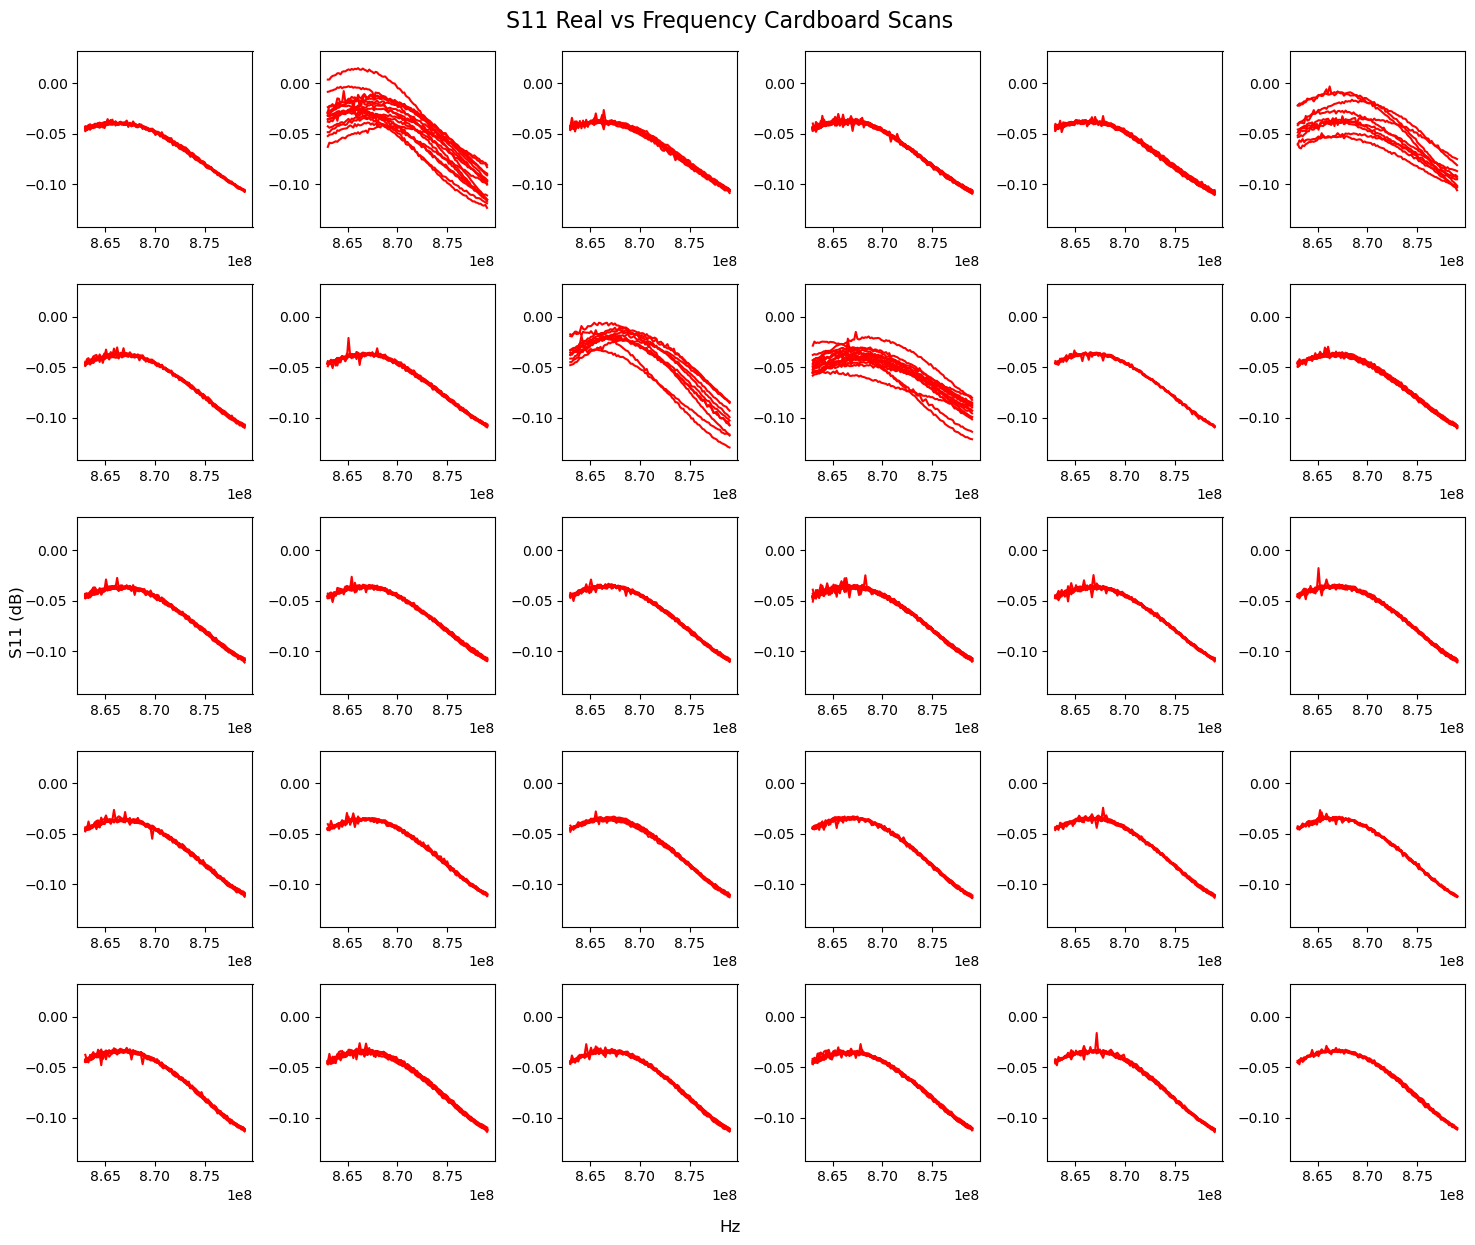

In [15]:
title = "S11 Real vs Frequency Cardboard Scans"
ylabel = "S11 (dB)"
fig = create_Sparam_gridplot(cardboard_data, cardboard_files, len(c_scans), 1, 'r', ymin, ymax, title, ylabel)
fig.savefig("graphs/cardboard_S11R.png")

### S11 Imag

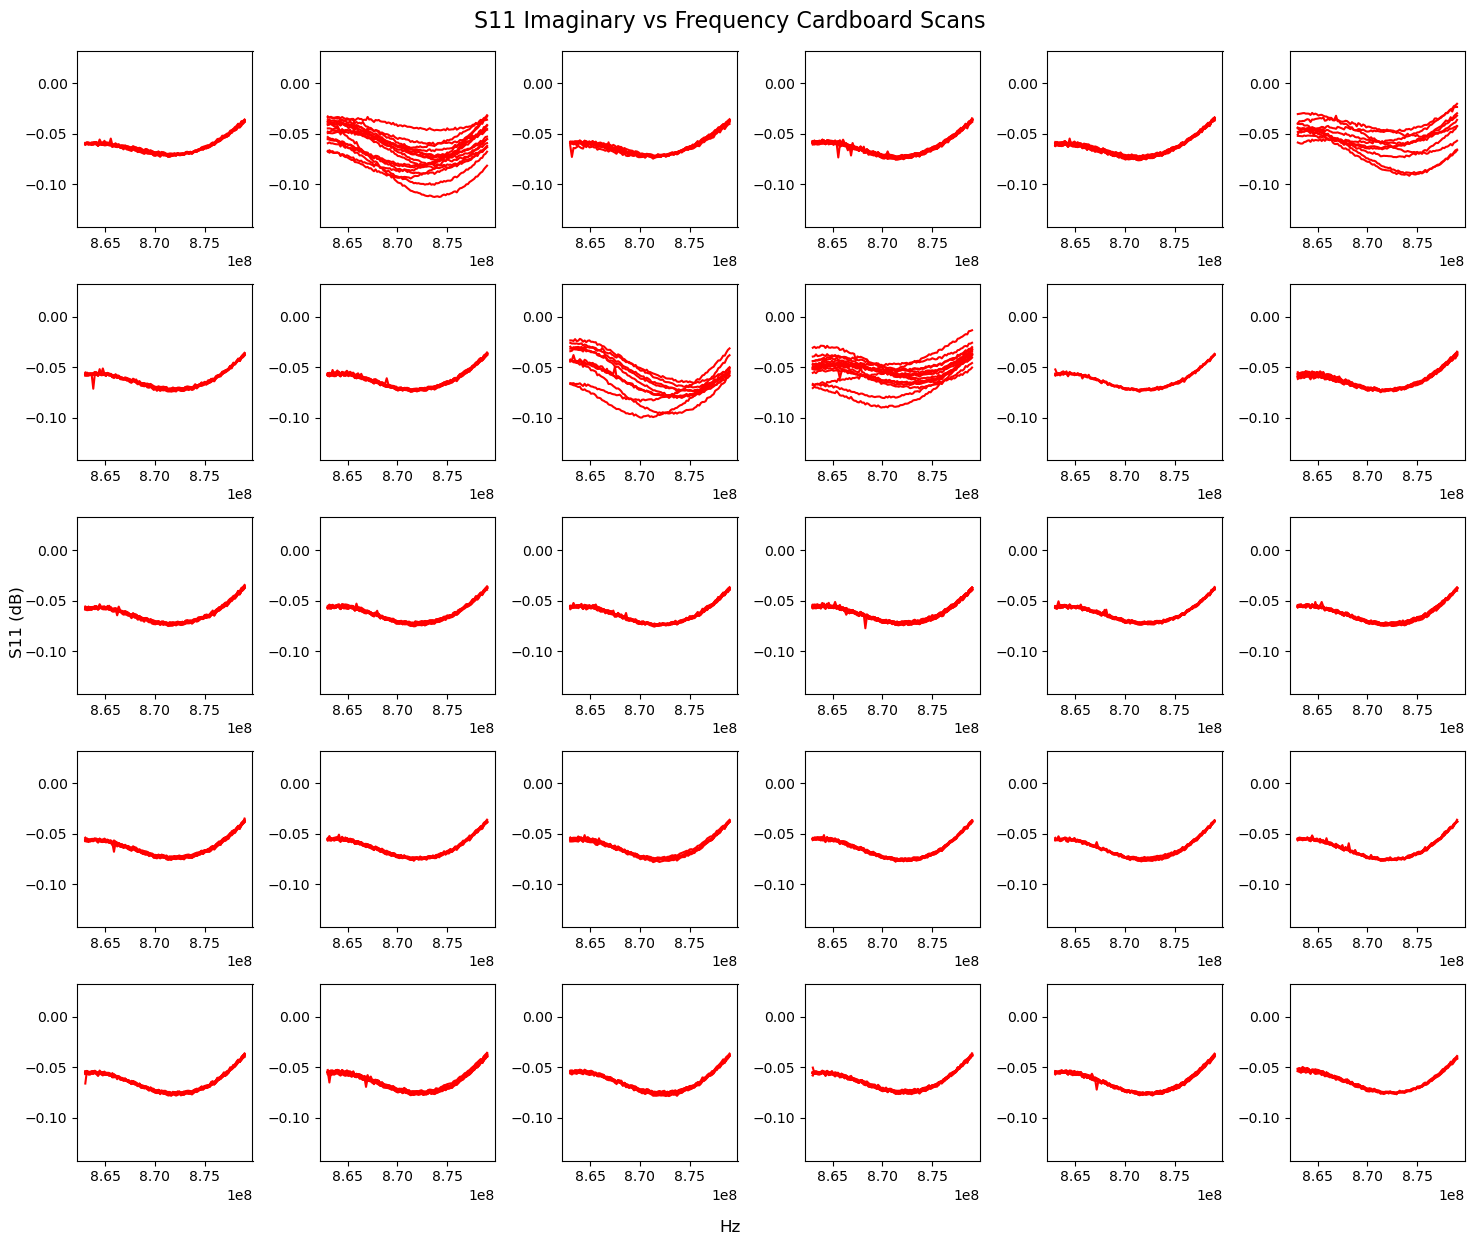

In [17]:
title = "S11 Imaginary vs Frequency Cardboard Scans"
ylabel = "S11 (dB)"
fig = create_Sparam_gridplot(cardboard_data, cardboard_files, len(c_scans), 2, 'r', ymin, ymax, title, ylabel)
fig.savefig("graphs/cardboard_S11I.png")

### S21 Real

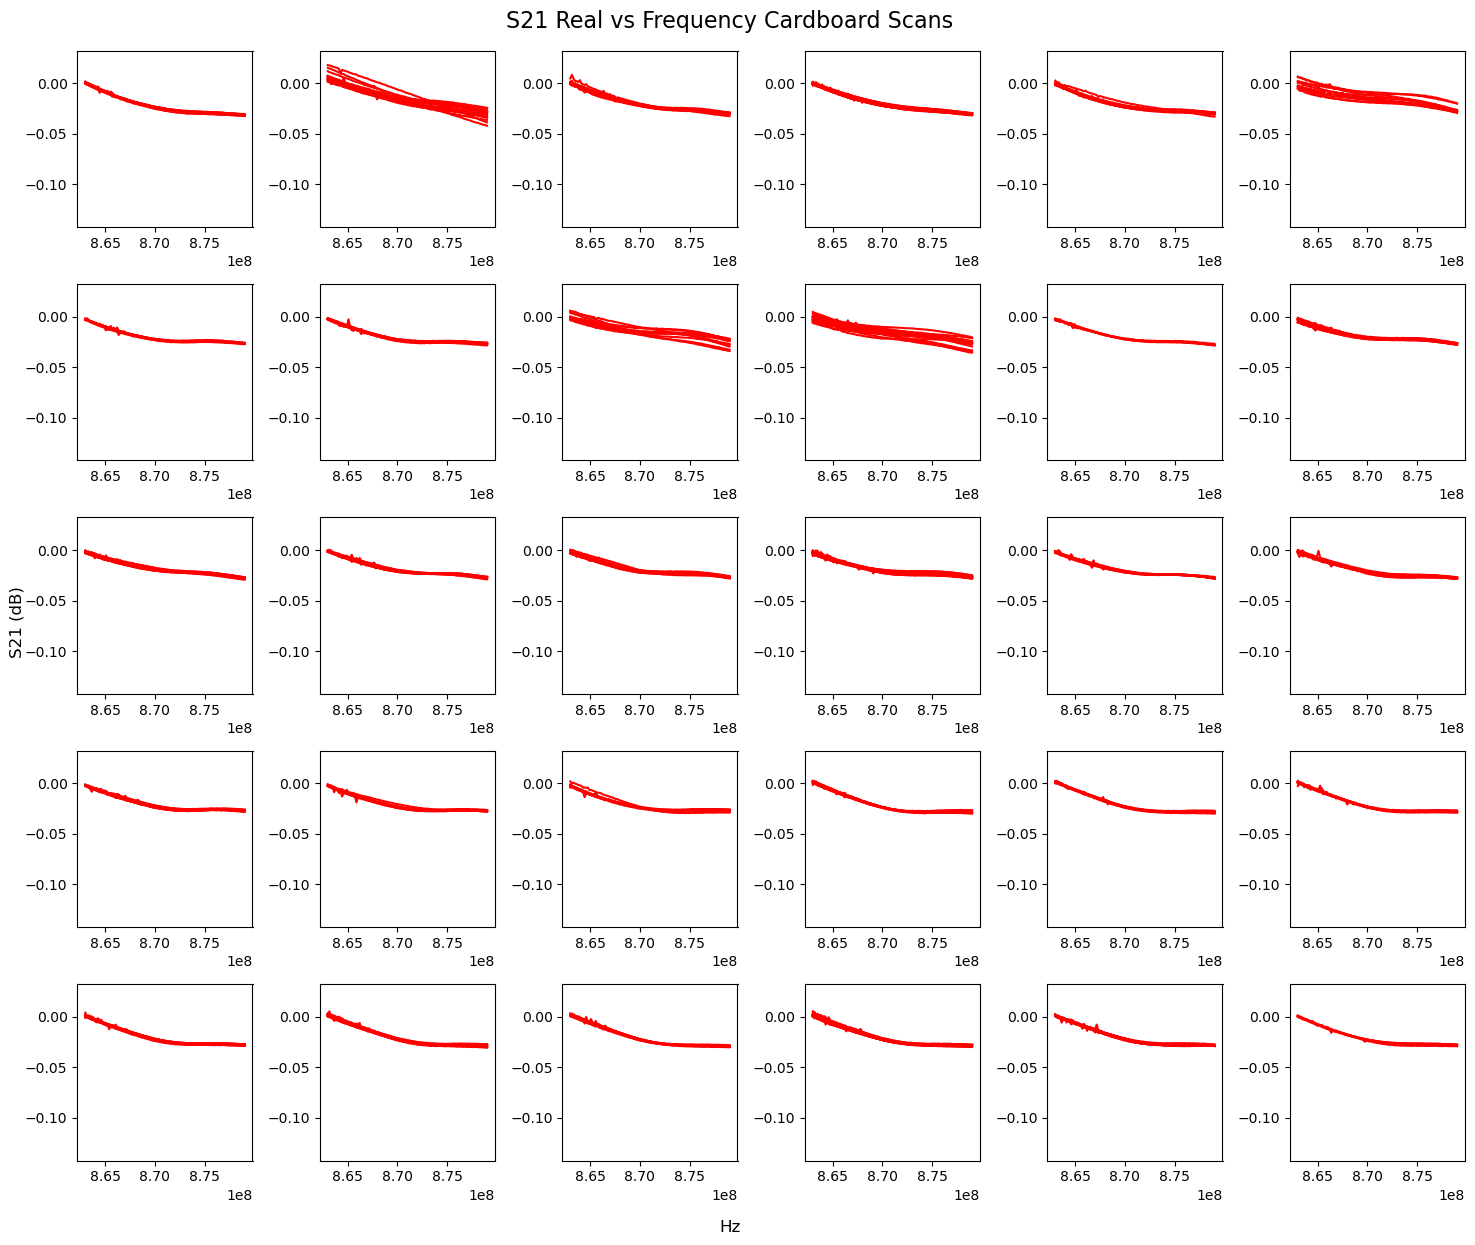

In [19]:
title = "S21 Real vs Frequency Cardboard Scans"
ylabel = "S21 (dB)"
fig = create_Sparam_gridplot(cardboard_data, cardboard_files, len(c_scans), 3, 'r', ymin, ymax, title, ylabel)
fig.savefig("graphs/cardboard_S21R.png")

### S21 Imag

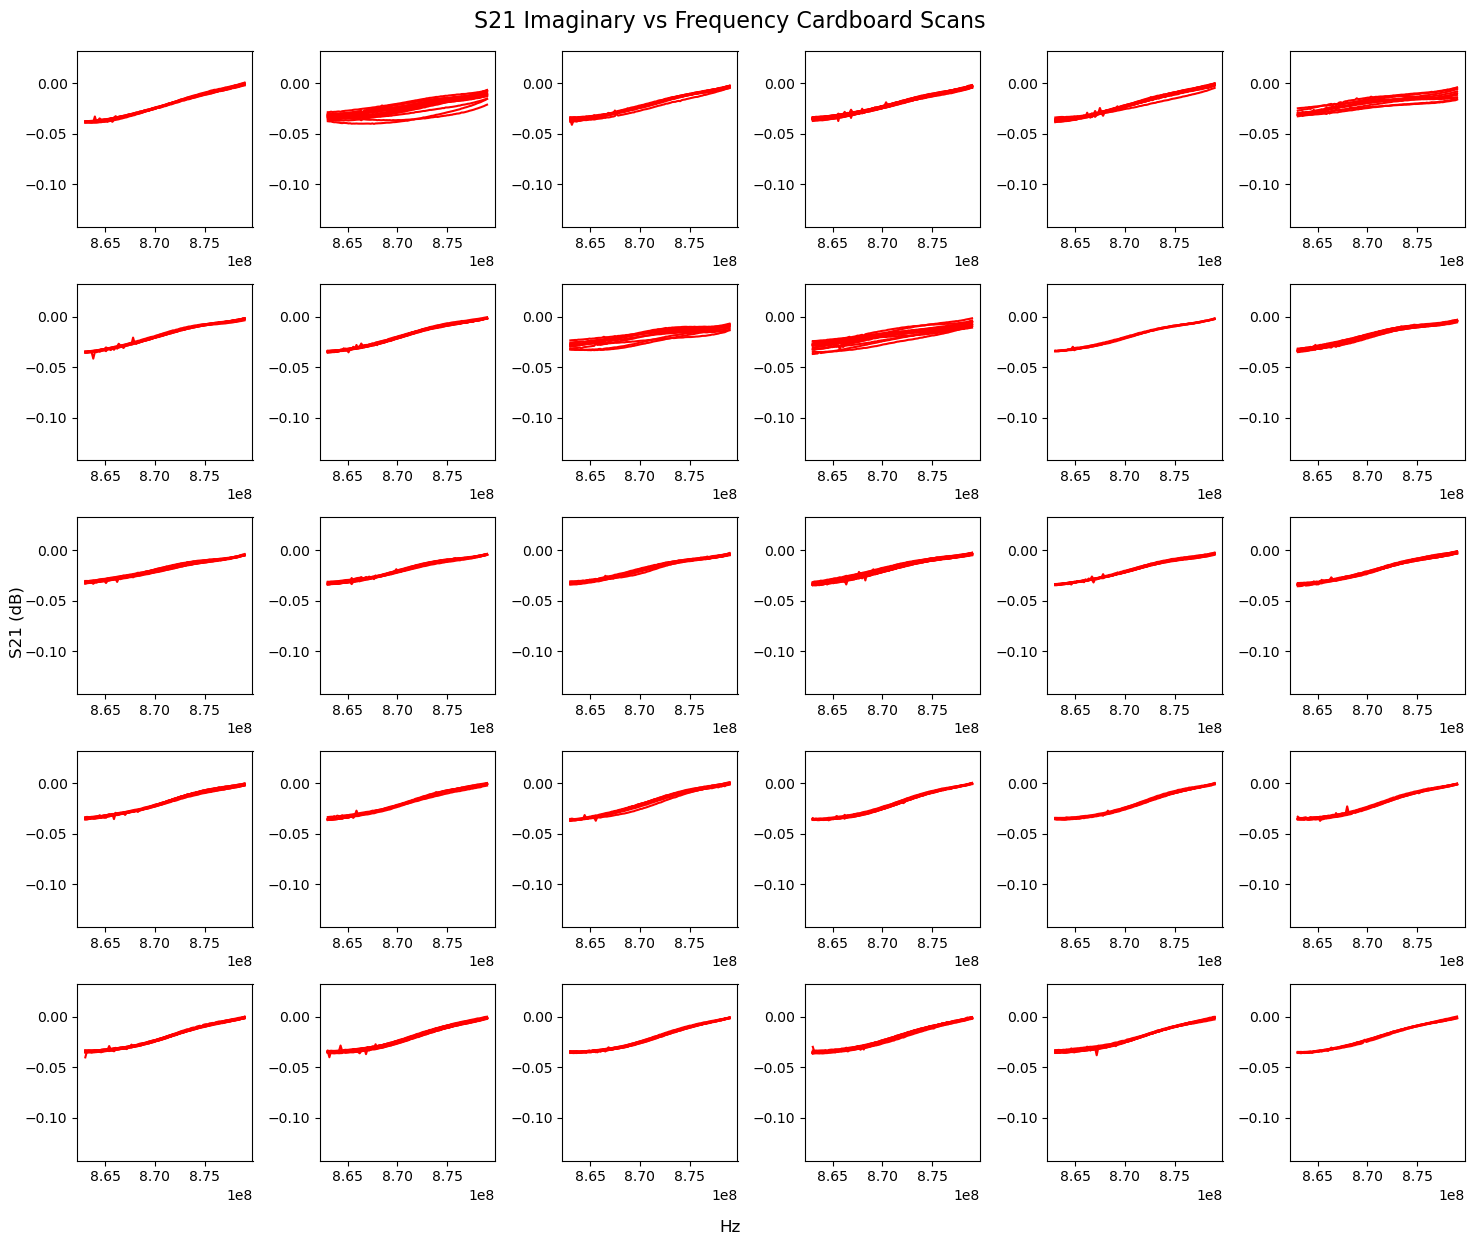

In [21]:
title = "S21 Imaginary vs Frequency Cardboard Scans"
ylabel = "S21 (dB)"
fig = create_Sparam_gridplot(cardboard_data, cardboard_files, len(c_scans), 4, 'r', ymin, ymax, title, ylabel)
fig.savefig("graphs/cardboard_S21I.png")

## Metal S-parameter grids
A gridplot is presented for each parameter (S11 real, S11 imaginary, S21 real and S21 imaginary)

### S11 Real

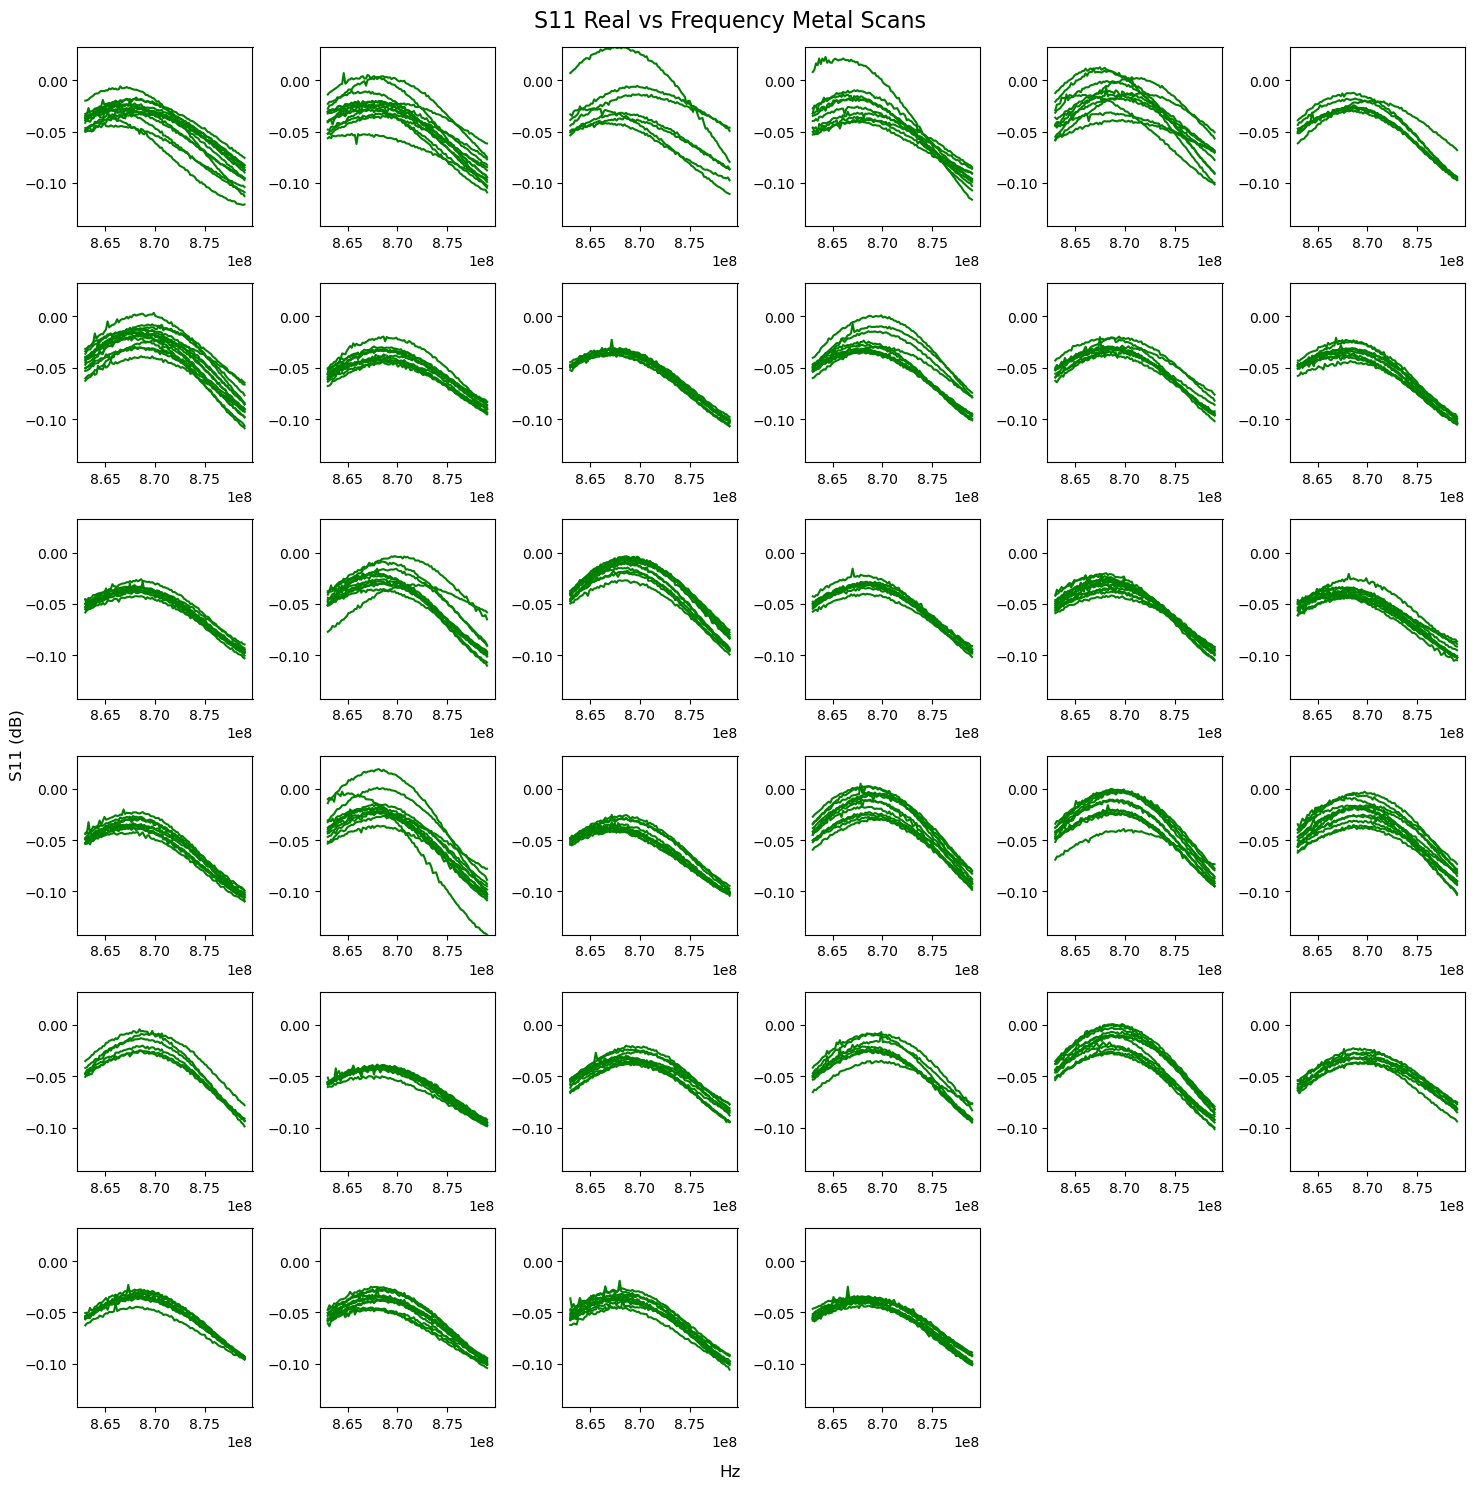

In [24]:
title = "S11 Real vs Frequency Metal Scans"
ylabel = "S11 (dB)"
fig = create_Sparam_gridplot(metal_data, metal_files, len(m_scans), 1, 'g', ymin, ymax, title, ylabel)
fig.savefig("graphs/metal_S11R.png")

### S11 Imag

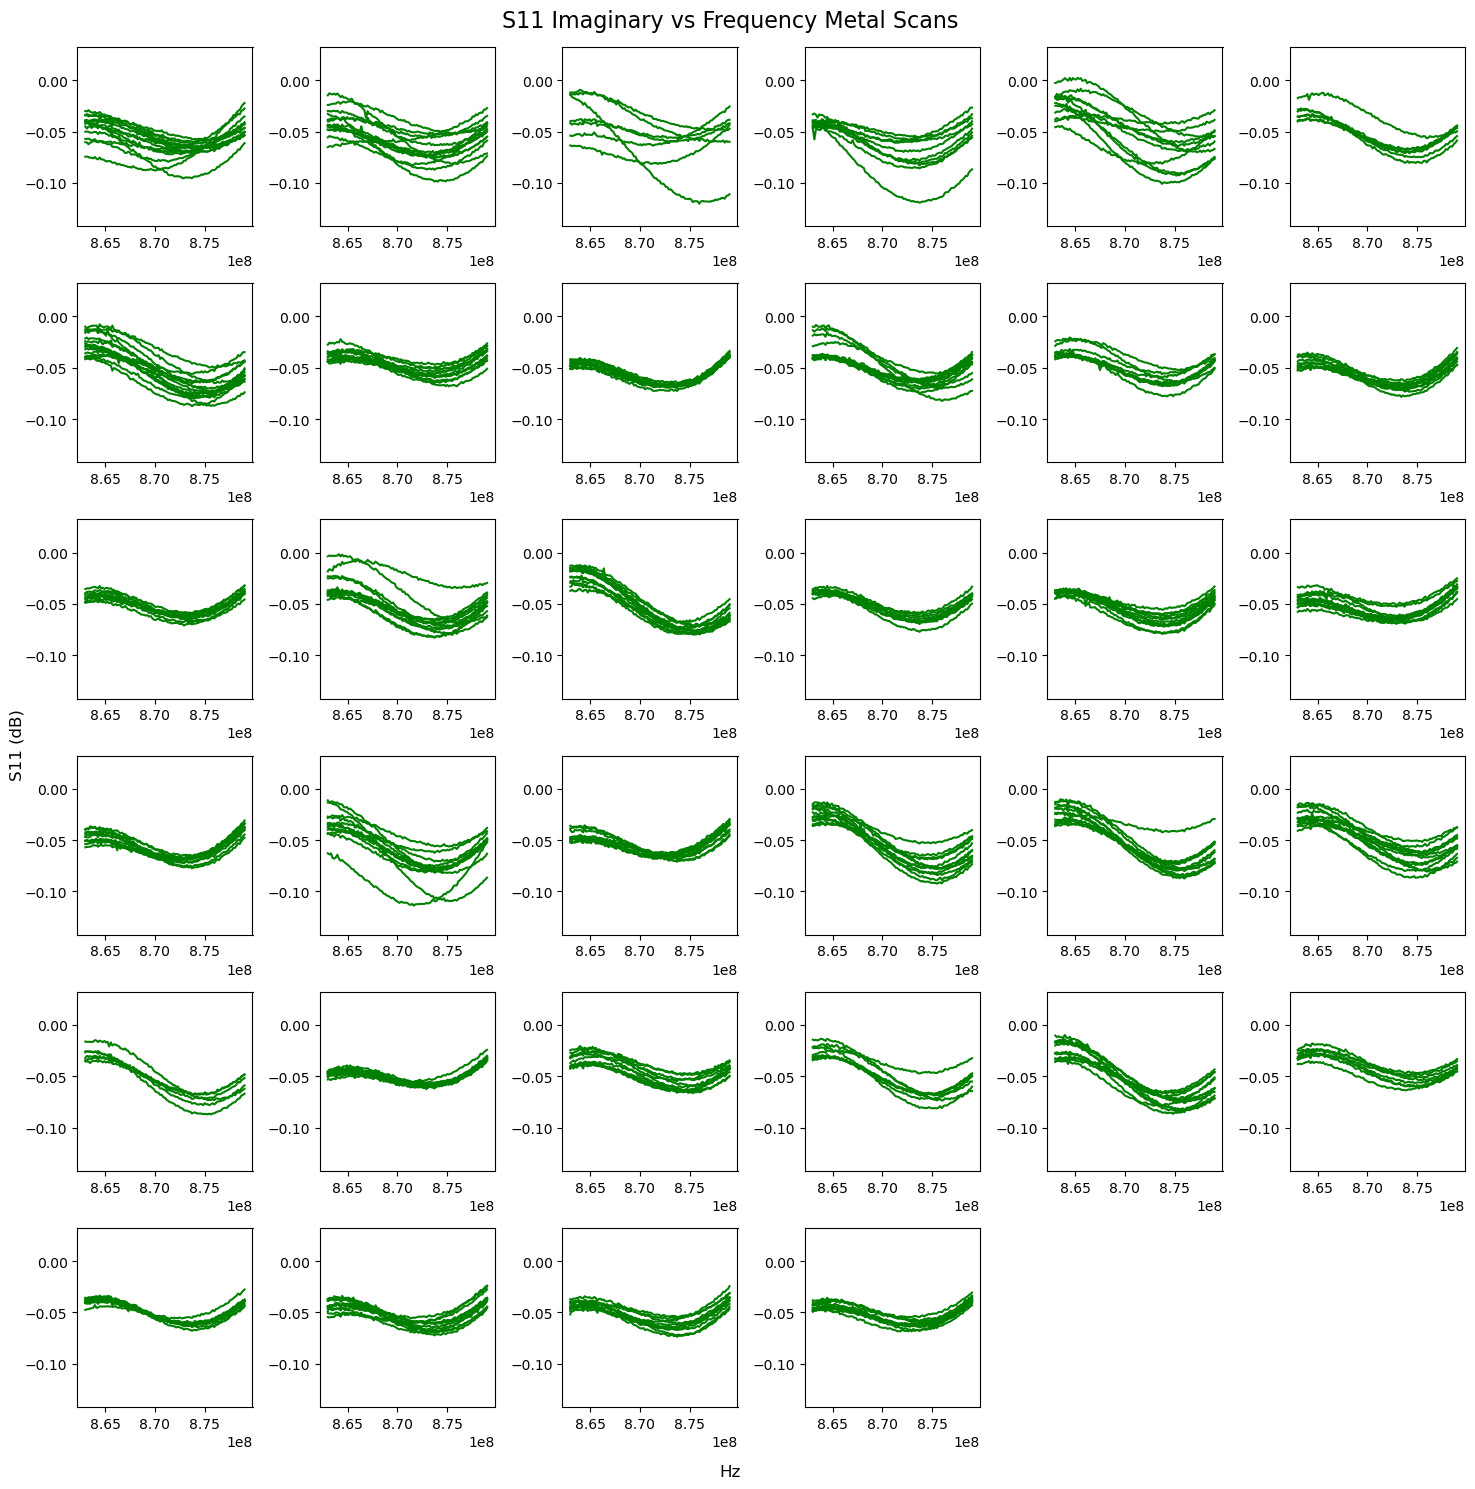

In [26]:
title = "S11 Imaginary vs Frequency Metal Scans"
ylabel = "S11 (dB)"
fig = create_Sparam_gridplot(metal_data, metal_files, len(m_scans), 2, 'g', ymin, ymax, title, ylabel)
fig.savefig("graphs/metal_S11I.png")

### S21 Real

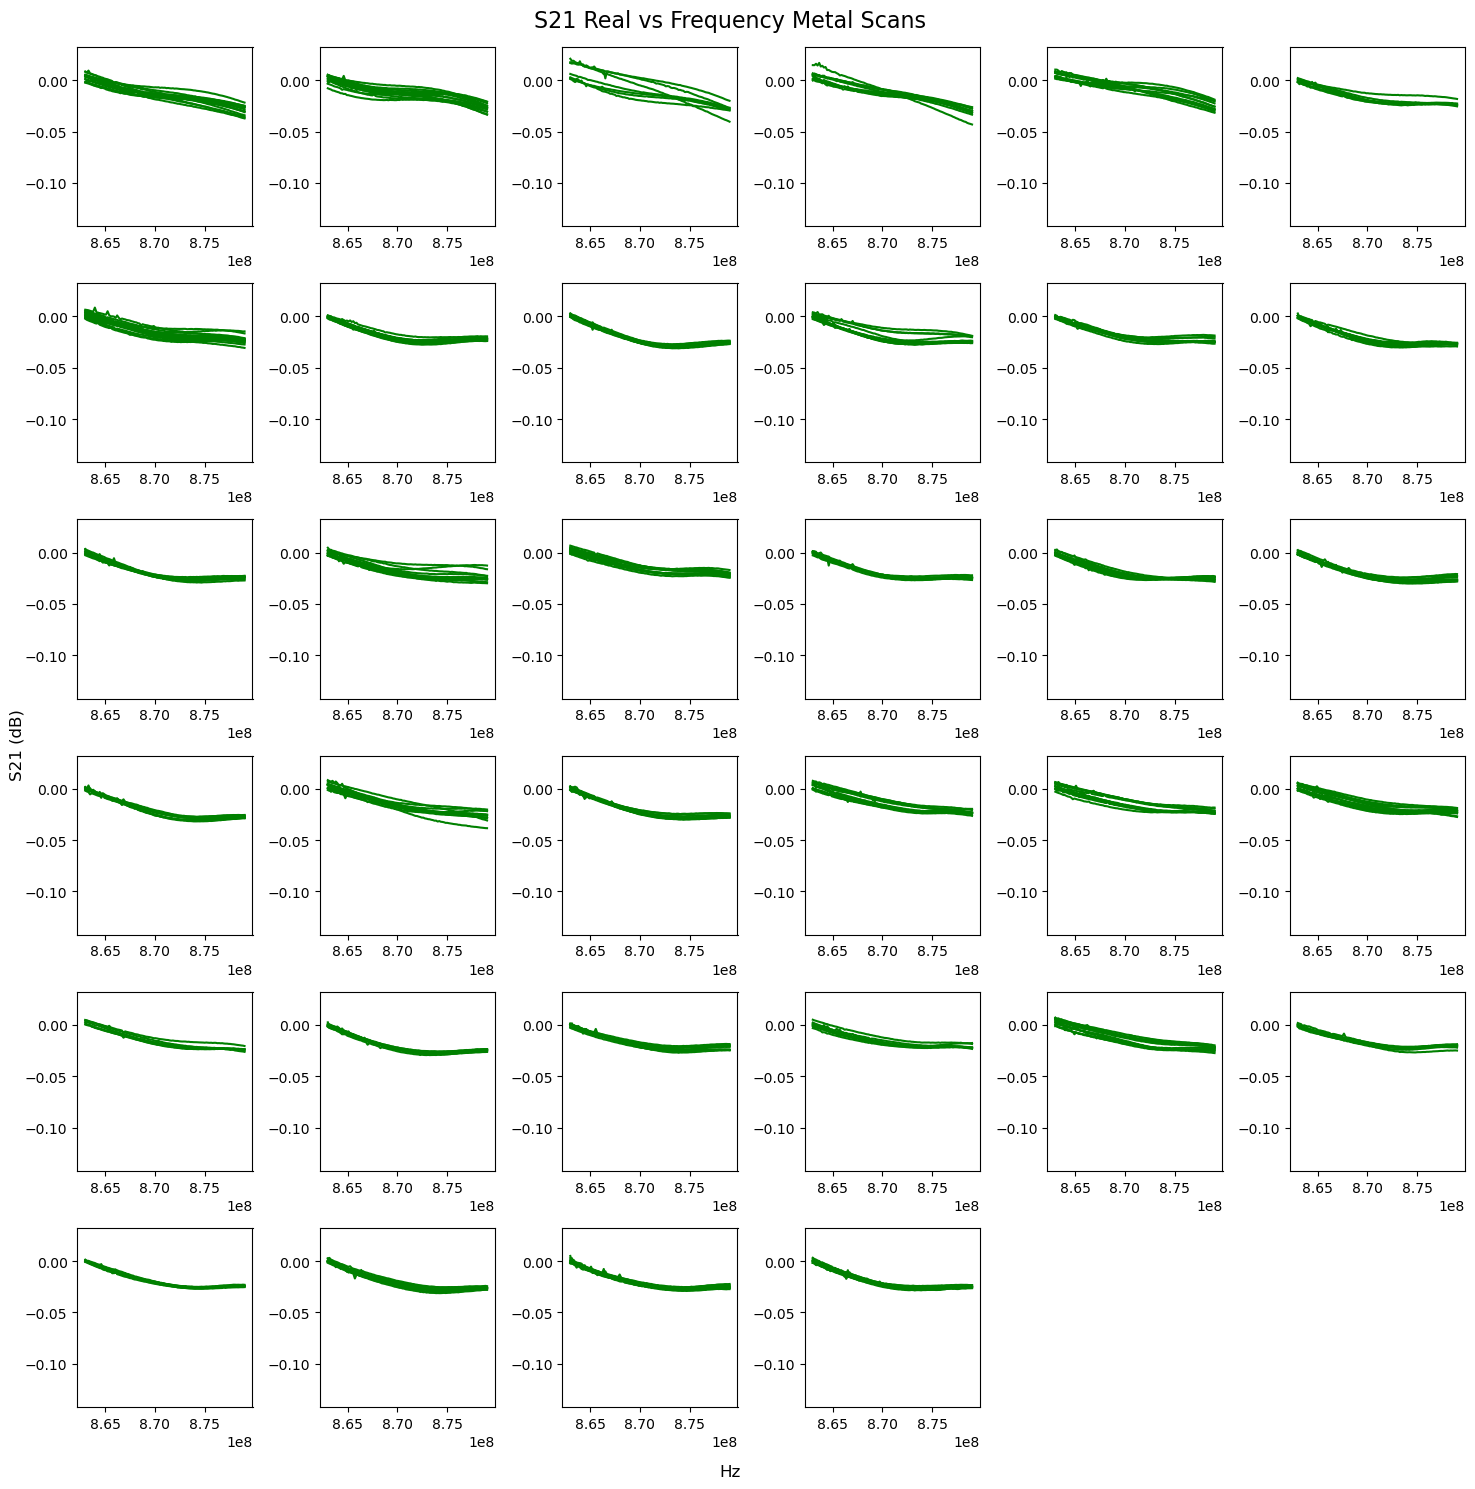

In [28]:
title = "S21 Real vs Frequency Metal Scans"
ylabel = "S21 (dB)"
fig = create_Sparam_gridplot(metal_data, metal_files, len(m_scans), 3, 'g', ymin, ymax, title, ylabel)
fig.savefig("graphs/metal_S21R.png")

### S21 Imag

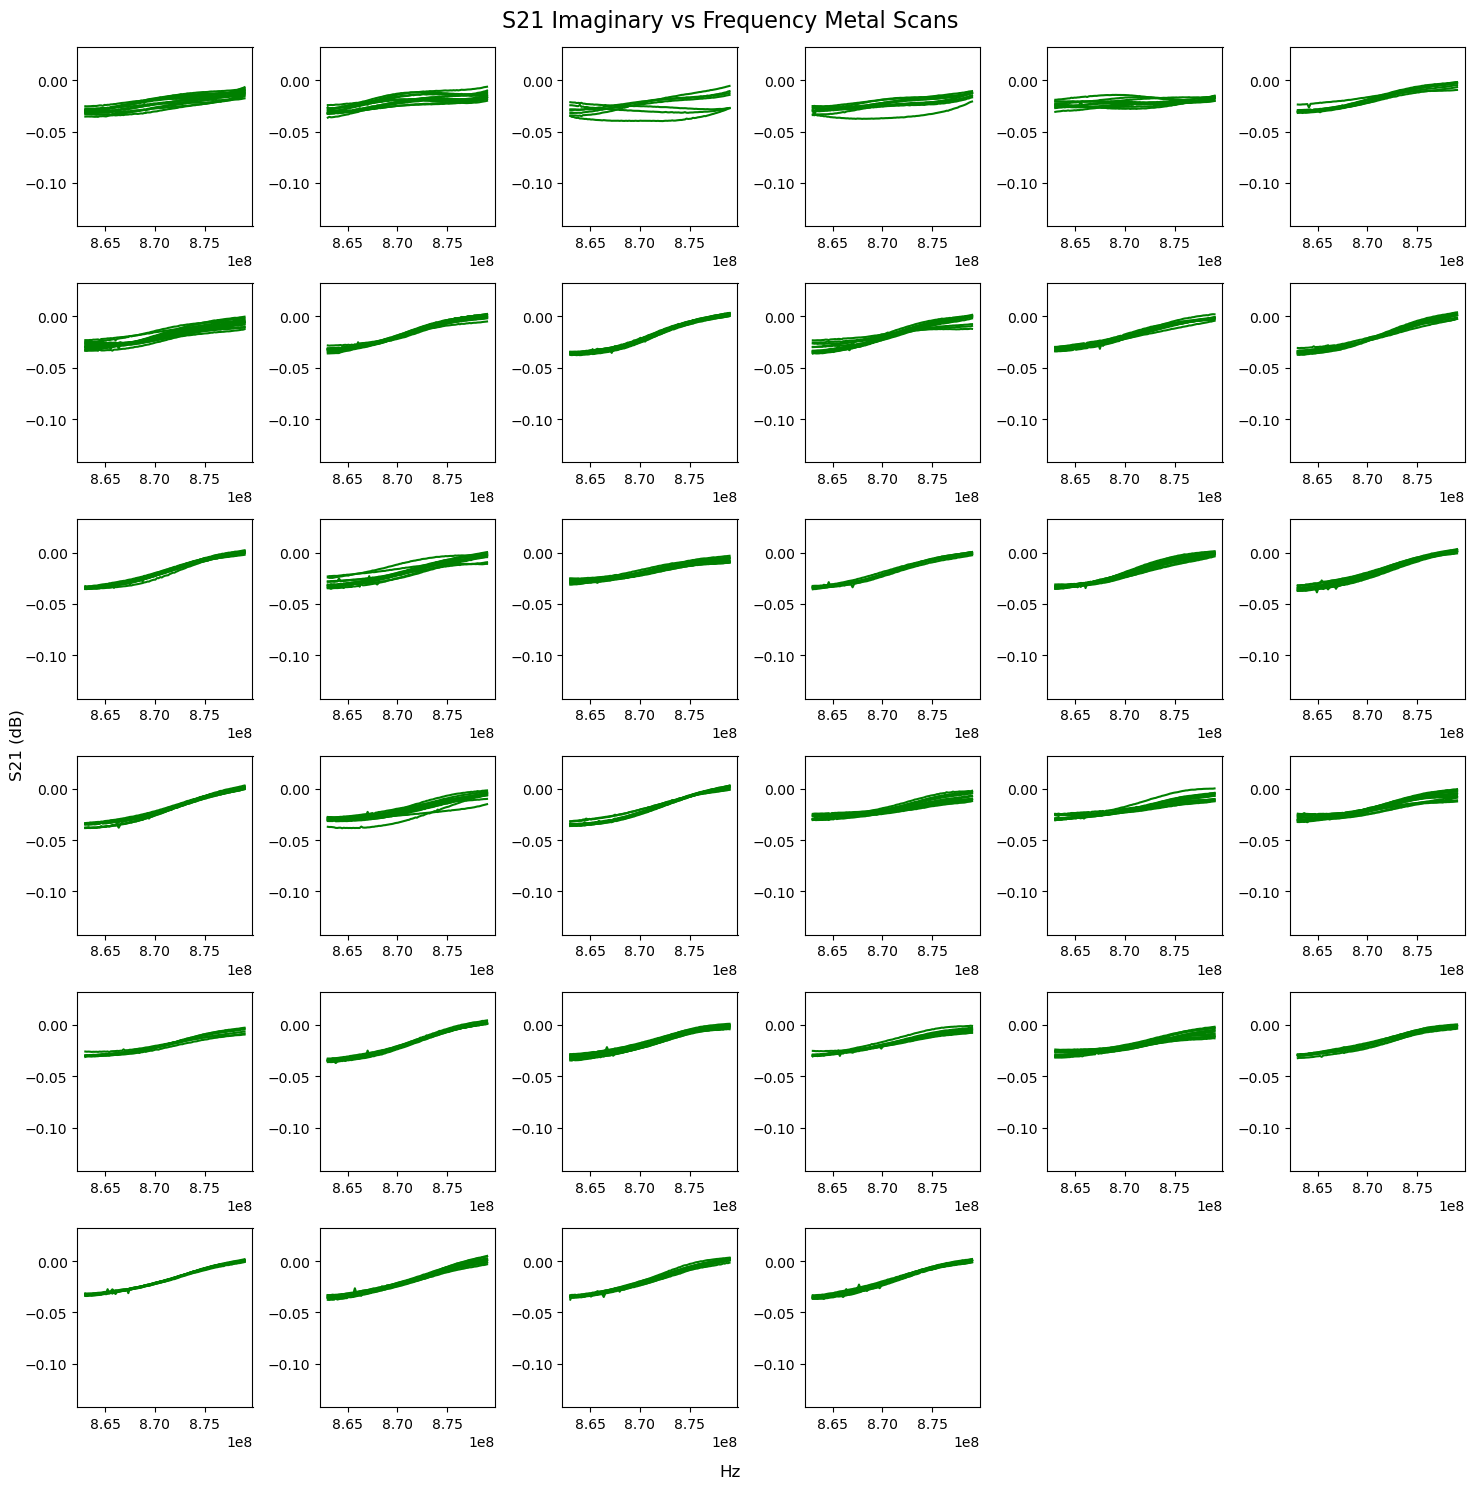

In [30]:
title = "S21 Imaginary vs Frequency Metal Scans"
ylabel = "S21 (dB)"
fig = create_Sparam_gridplot(metal_data, metal_files, len(m_scans), 4, 'g', ymin, ymax, title, ylabel)
fig.savefig("graphs/metal_S21I.png")

## Plastic S-parameter grids
A gridplot is presented for each parameter (S11 real, S11 imaginary, S21 real and S21 imaginary)

### S11 Real

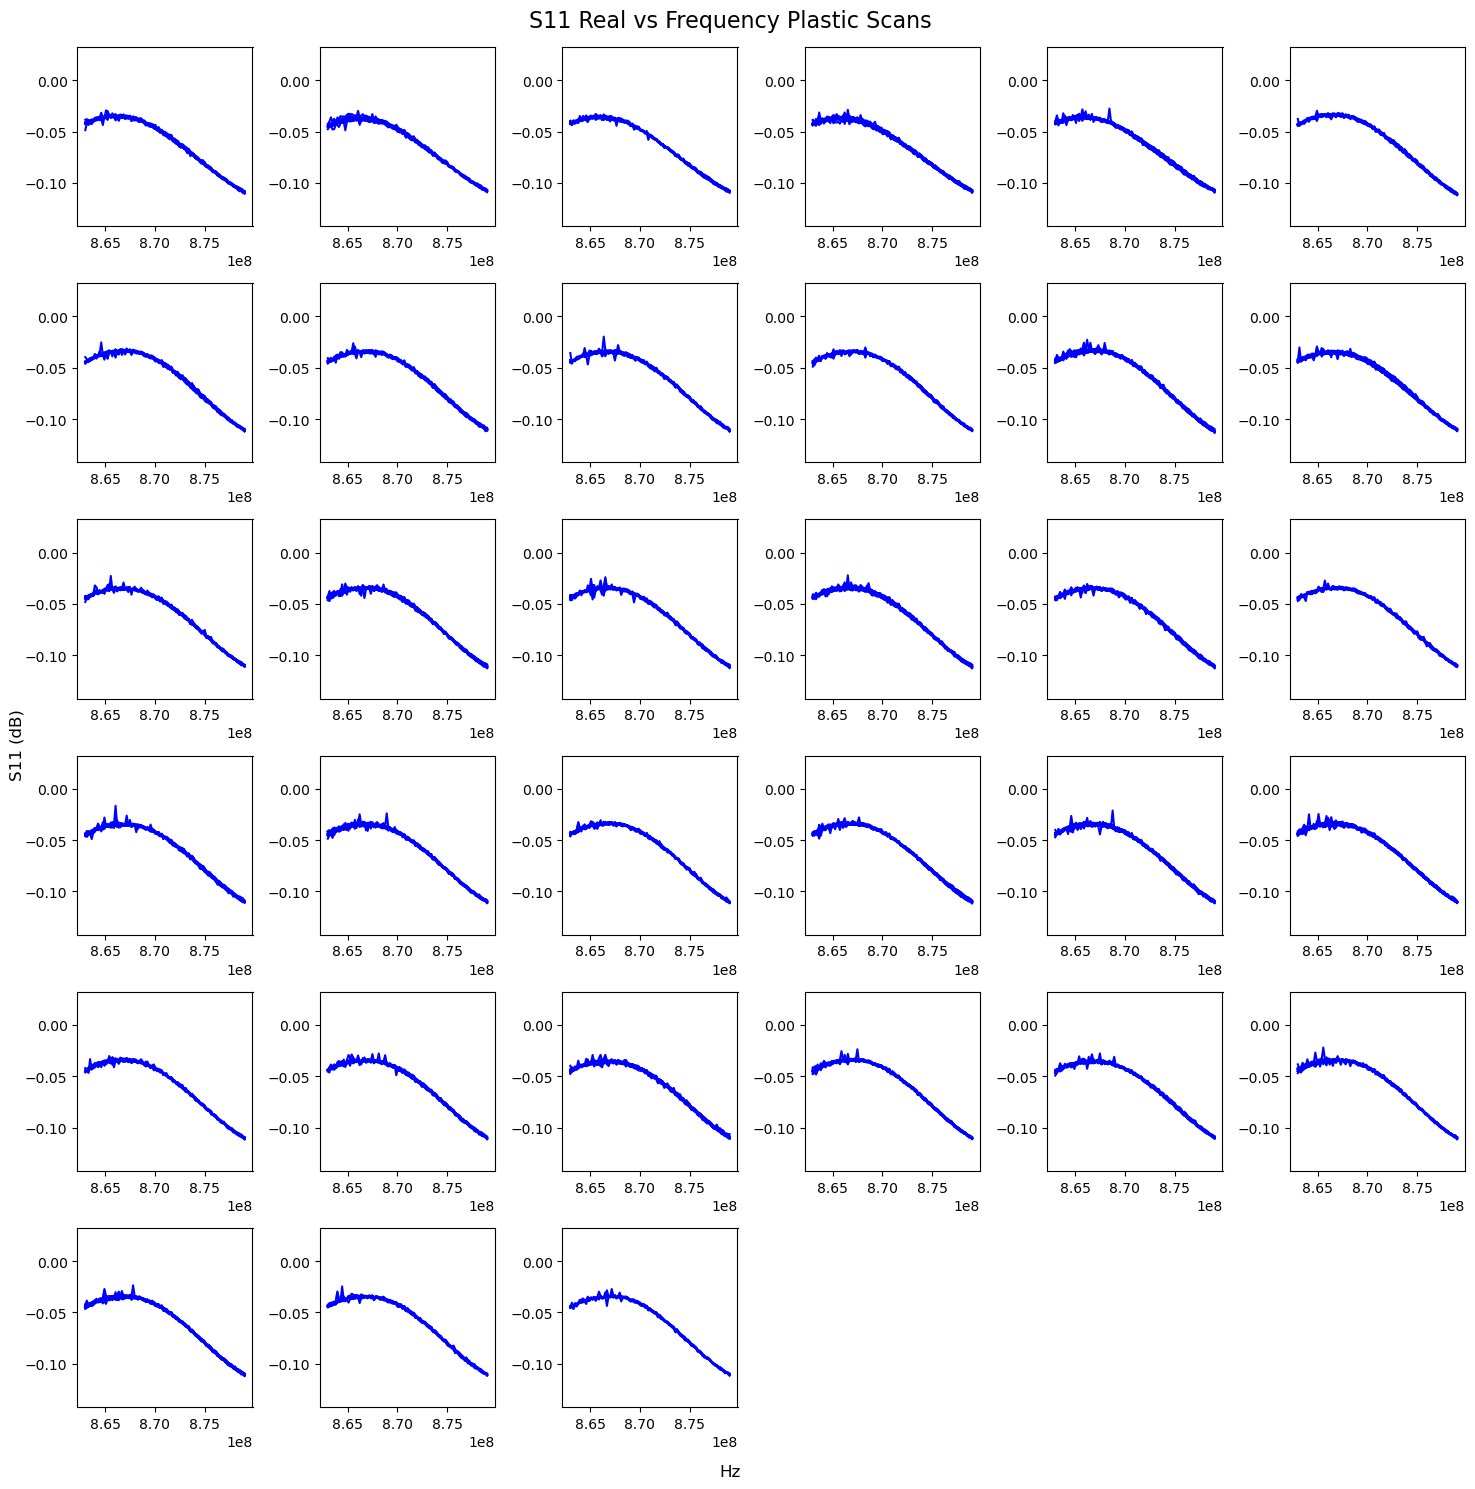

In [33]:
title = "S11 Real vs Frequency Plastic Scans"
ylabel = "S11 (dB)"
fig = create_Sparam_gridplot(plastic_data, plastic_files, len(p_scans), 1, 'b', ymin, ymax, title, ylabel)
fig.savefig("graphs/plastic_S11R.png")

### S11 Imag

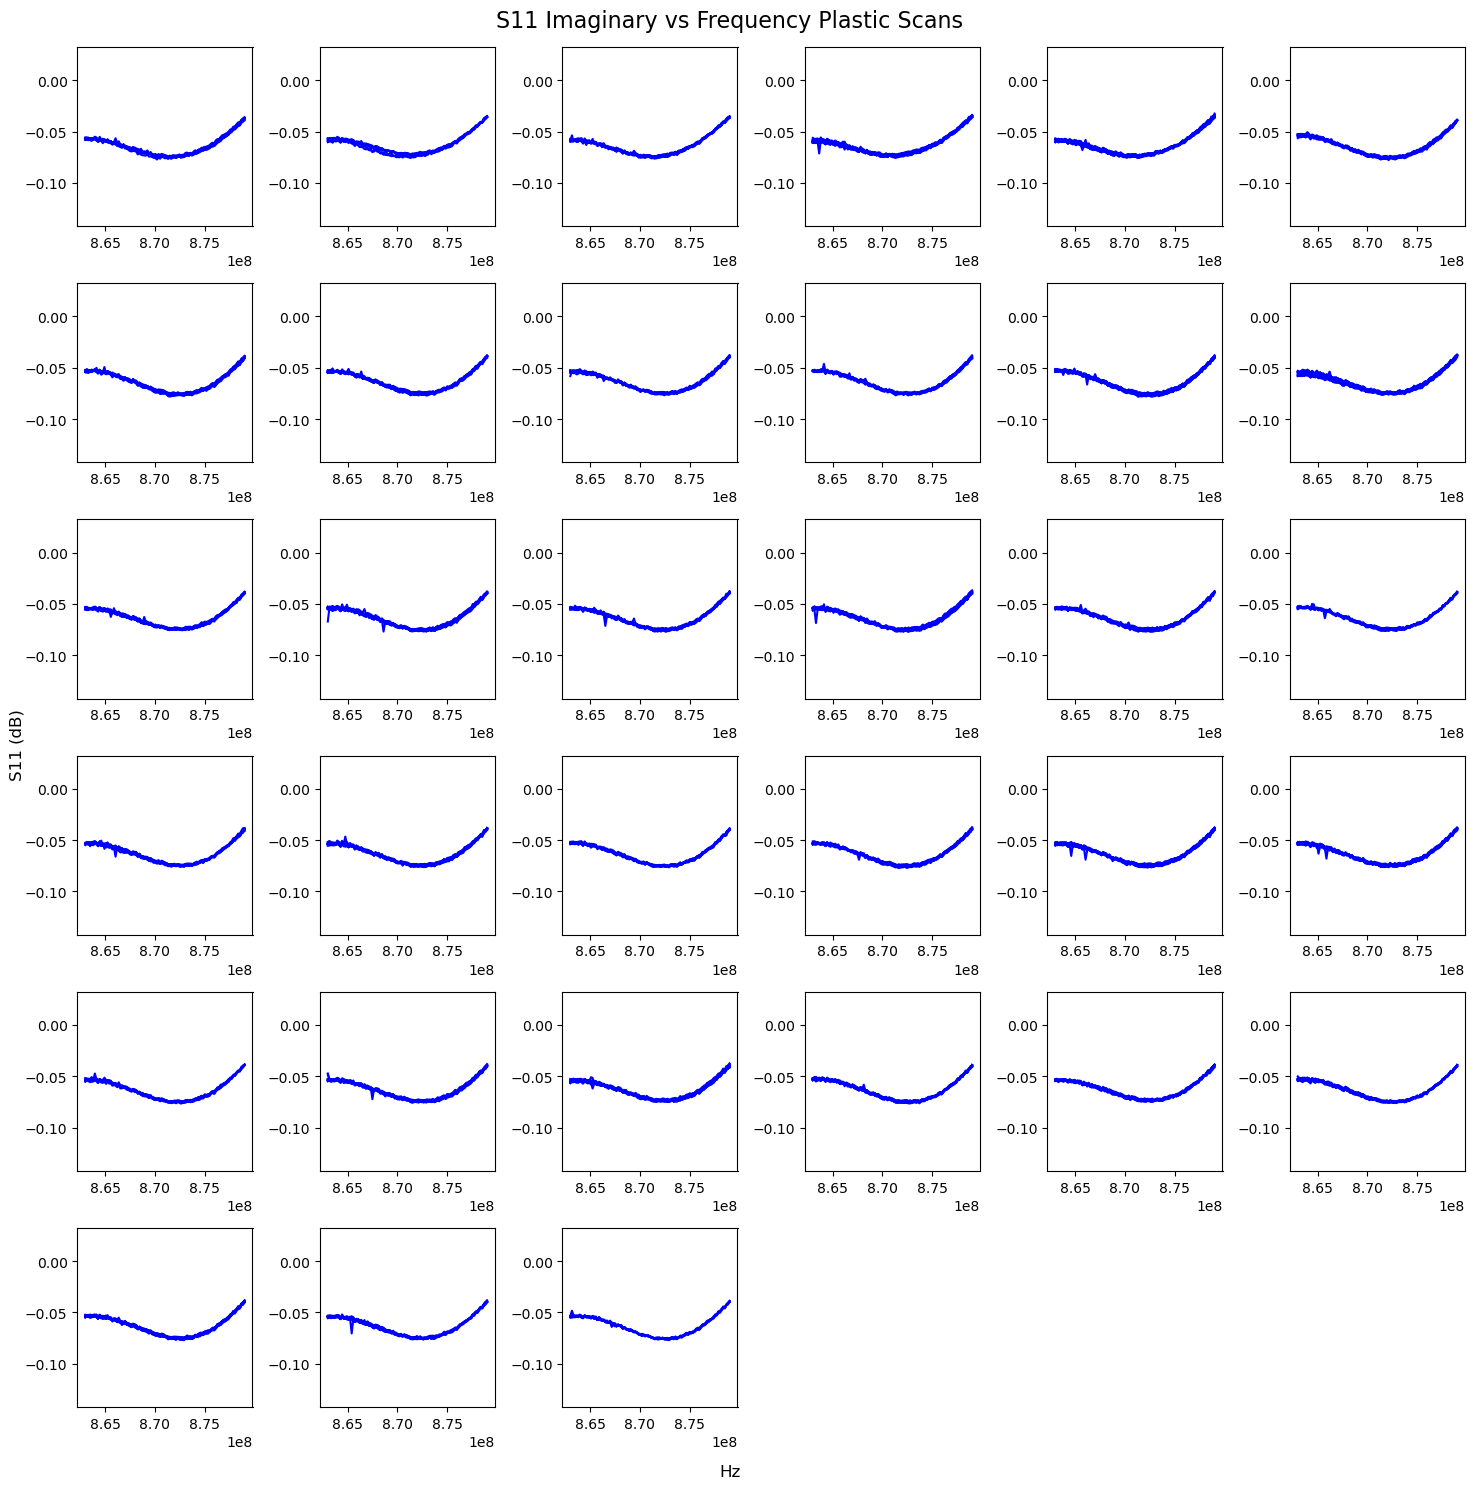

In [35]:
title = "S11 Imaginary vs Frequency Plastic Scans"
ylabel = "S11 (dB)"
fig = create_Sparam_gridplot(plastic_data, plastic_files, len(p_scans), 2, 'b', ymin, ymax, title, ylabel)
fig.savefig("graphs/plastic_S11I.png")

### S21 Real

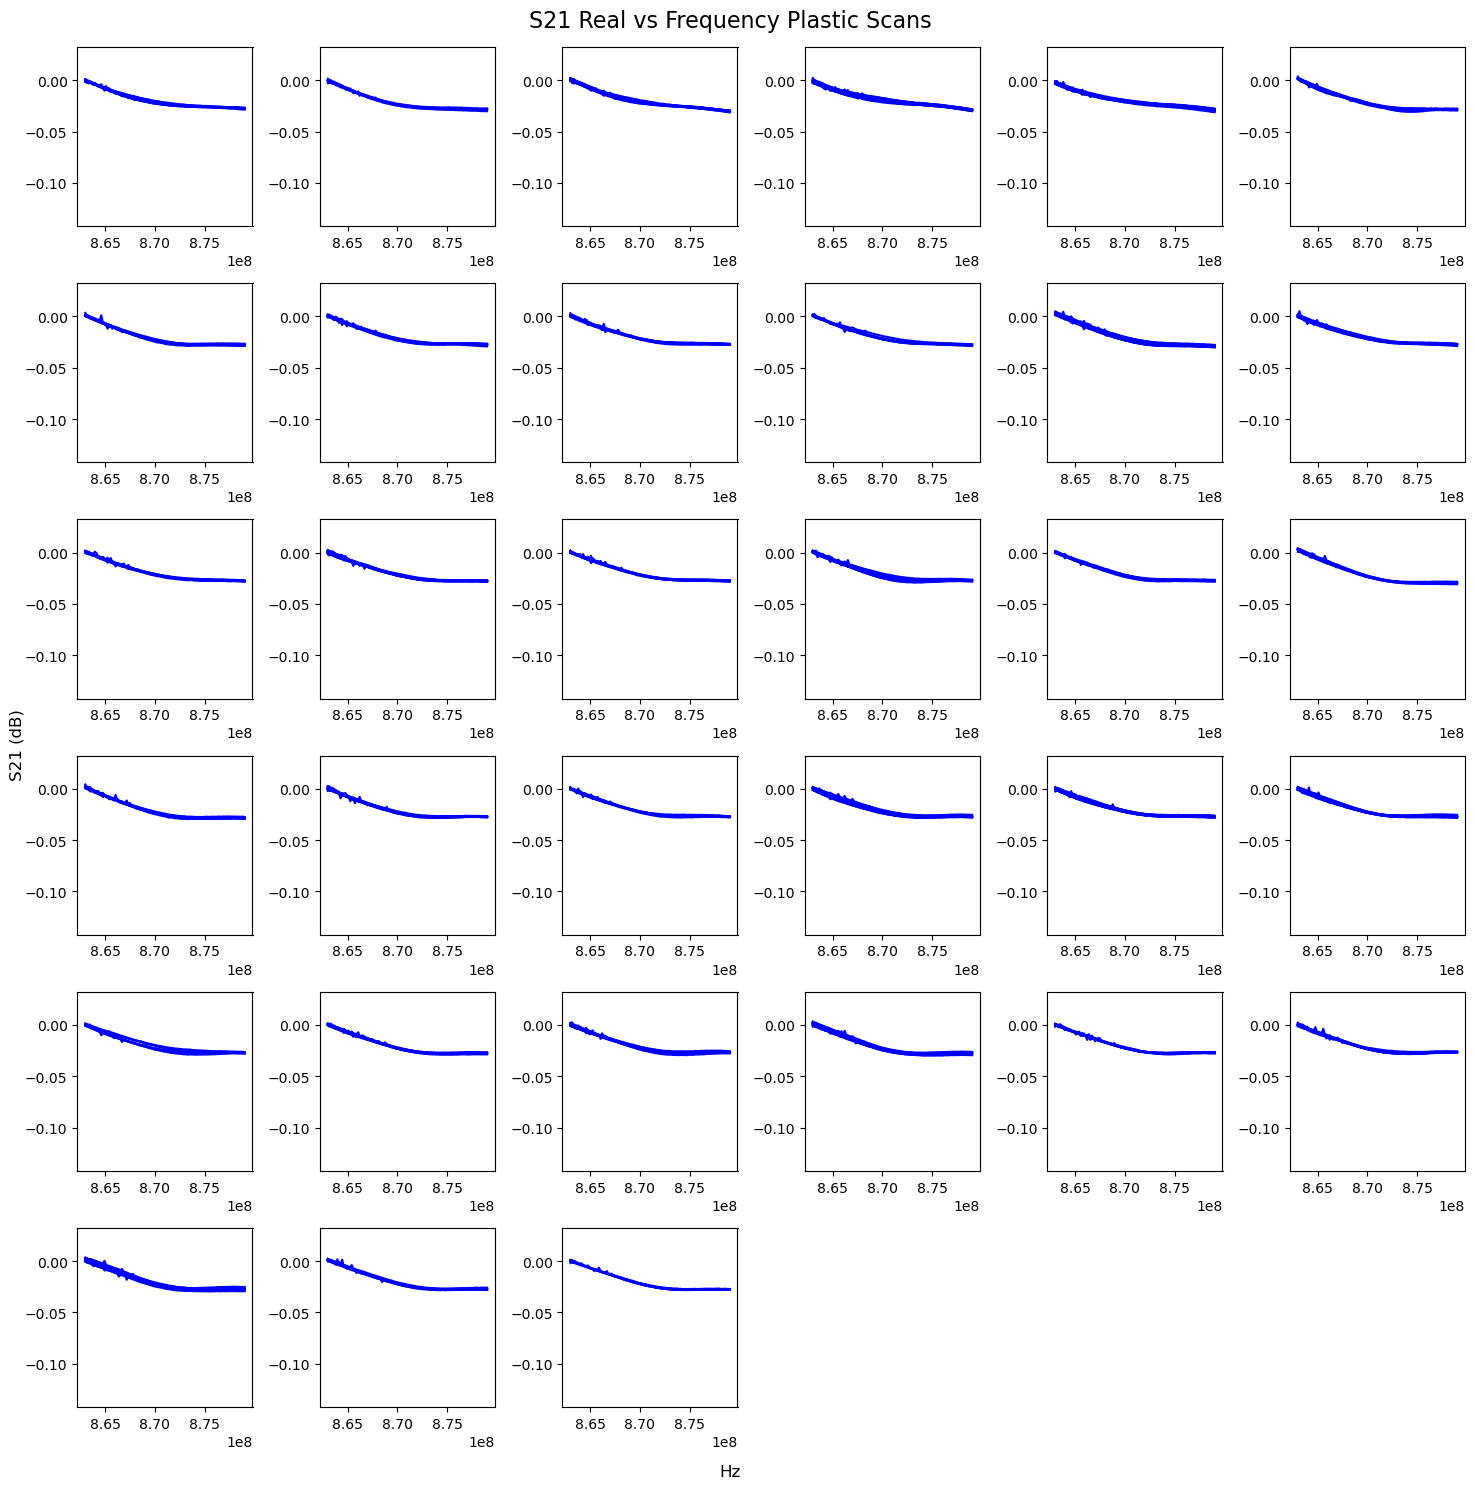

In [37]:
title = "S21 Real vs Frequency Plastic Scans"
ylabel = "S21 (dB)"
fig = create_Sparam_gridplot(plastic_data, plastic_files, len(p_scans), 3, 'b', ymin, ymax, title, ylabel)
fig.savefig("graphs/plastic_S21R.png")

### S21 Imag

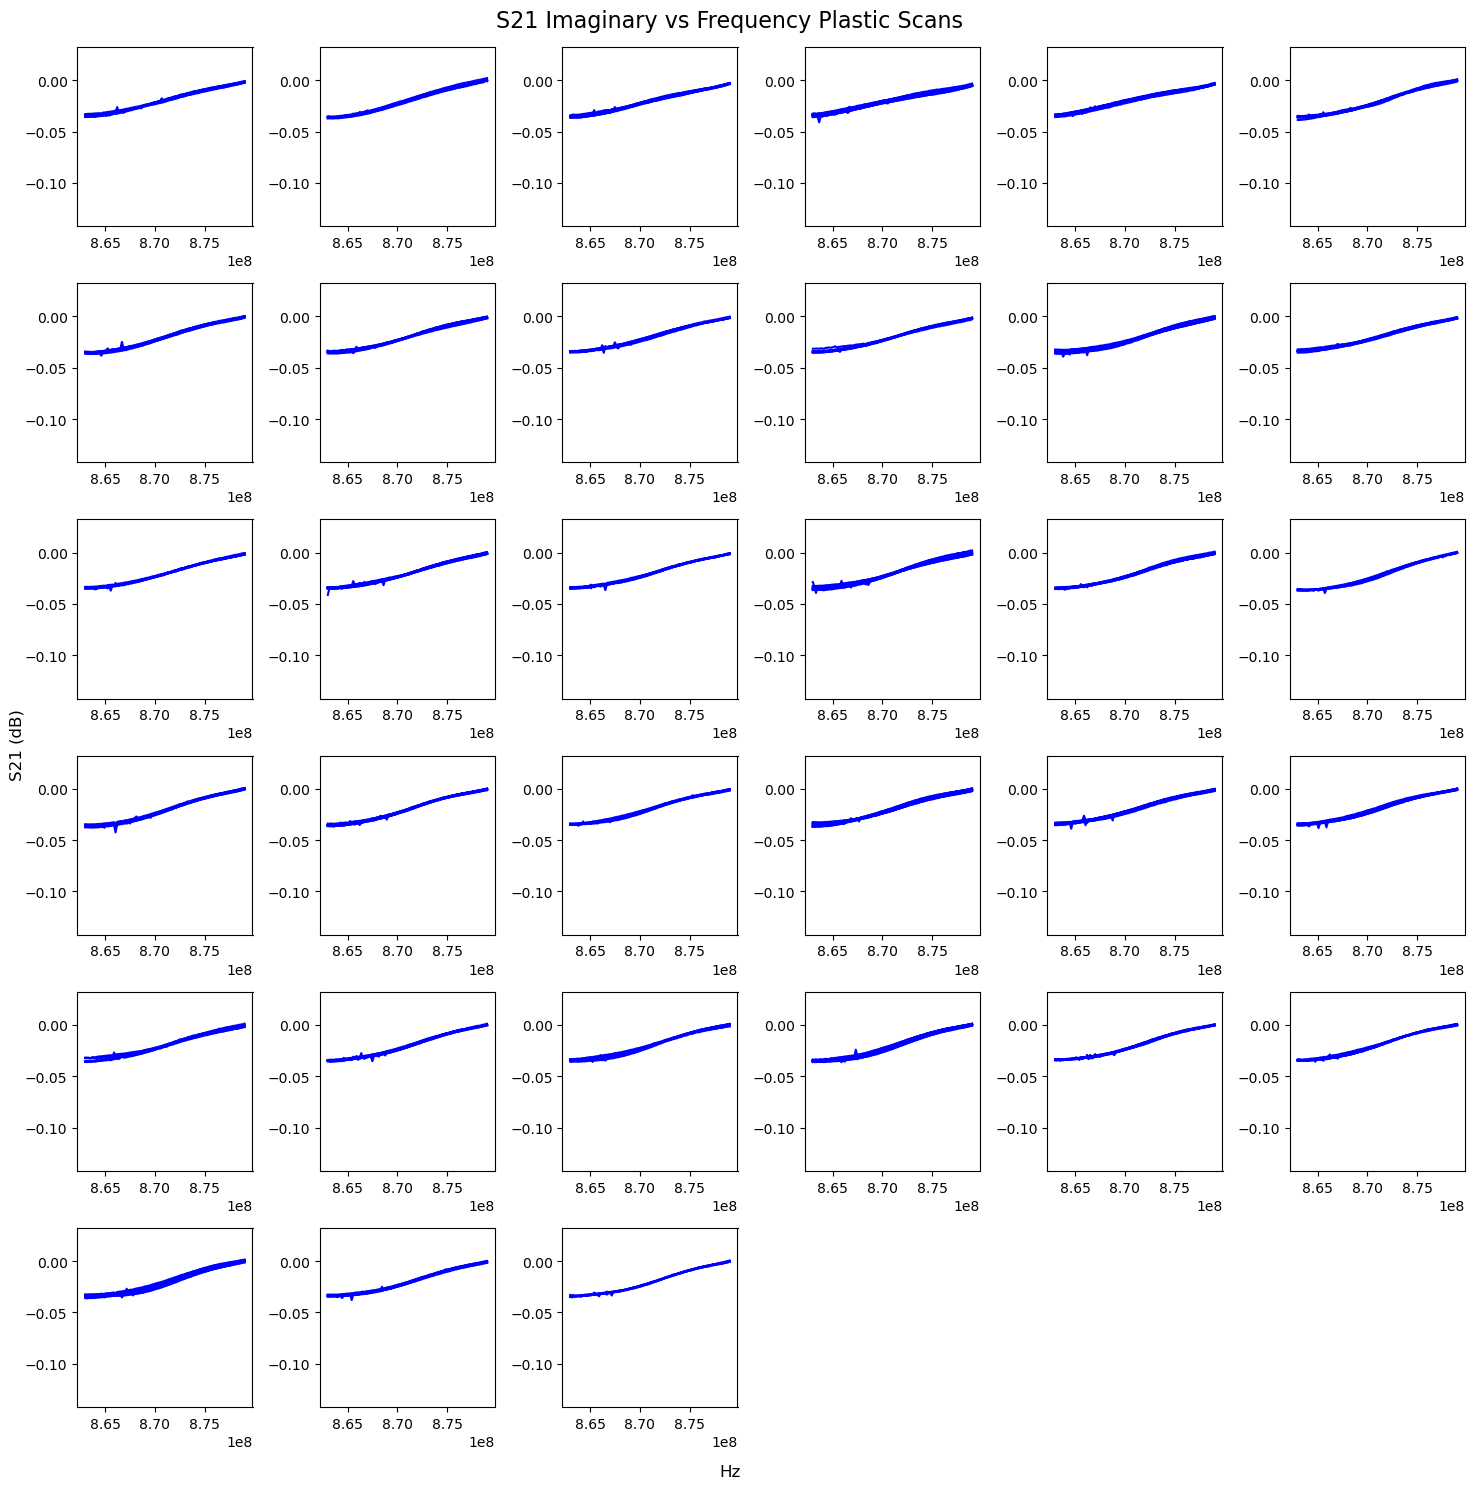

In [39]:
title = "S21 Imaginary vs Frequency Plastic Scans"
ylabel = "S21 (dB)"
fig = create_Sparam_gridplot(plastic_data, plastic_files, len(p_scans), 4, 'b', ymin, ymax, title, ylabel)
fig.savefig("graphs/plastic_S21I.png")

## All classes
Show scans of all classes in a single plot to show intra-class variation.

### S11 real

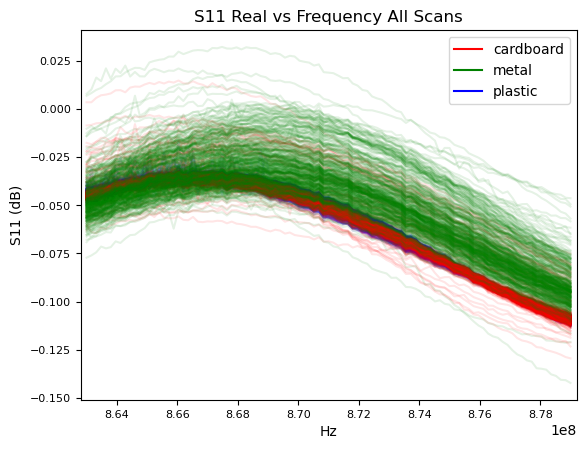

In [42]:
fig = plt.figure()
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=8)
plot.tick_params(axis='both', which='minor', labelsize=6)

for file in plastic_data:
    plt.plot(file[:, 0], file[:, 1], 'b', alpha = 0.1)#:
for file in cardboard_data:
    plt.plot(file[:, 0], file[:, 1], 'r', alpha = 0.1)#s
for file in metal_data:
    plt.plot(file[:, 0], file[:, 1], 'g', alpha = 0.1)#-

#plot single points to add legend
plt.plot(0, 0, 'r', label = "cardboard")
plt.plot(0, 0, 'g', label = "metal")
plt.plot(0, 0, 'b', label = "plastic")


ax = plt.gca()
ax.legend()
ax.set_xlim([862800000, 879200000])

plt.xlabel("Hz")
plt.ylabel("S11 (dB)")
plt.title("S11 Real vs Frequency All Scans")
#plt.savefig("Graphs/All_S11R.png")
plt.show()

### S11 complex

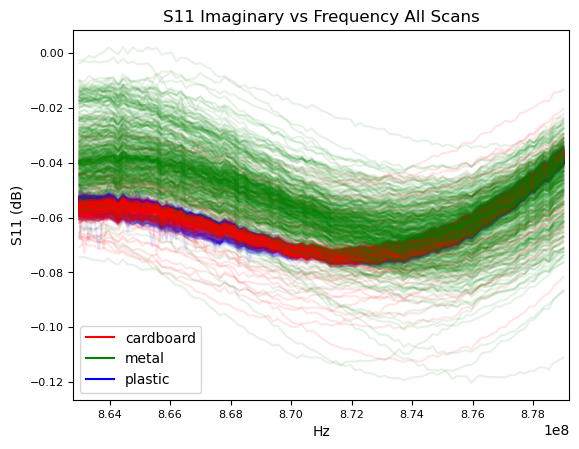

In [44]:
fig = plt.figure()
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=8)
plot.tick_params(axis='both', which='minor', labelsize=6)

# Prepare the plot, and take into account, that I like
# the plot's lines a tad ticker than the default.
#plt.plot(txt[:,0], txt[:,3], linewidth = 1.5)

for file in plastic_data:
    plt.plot(file[:, 0], file[:, 2], 'b', alpha = 0.1)#:
for file in cardboard_data:
    plt.plot(file[:, 0], file[:, 2], 'r', alpha = 0.1)#s
for file in metal_data:
    plt.plot(file[:, 0], file[:, 2], 'g', alpha = 0.1)#-

#plot single points to add legend
plt.plot(0, 0, 'r', label = "cardboard")
plt.plot(0, 0, 'g', label = "metal")
plt.plot(0, 0, 'b', label = "plastic")

ax = plt.gca()
ax.legend()
ax.set_xlim([862800000, 879200000])

plt.xlabel("Hz")
plt.ylabel("S11 (dB)")
plt.title("S11 Imaginary vs Frequency All Scans")
#plt.savefig("Graphs/All_S11I.png")
plt.show()

### S21 real

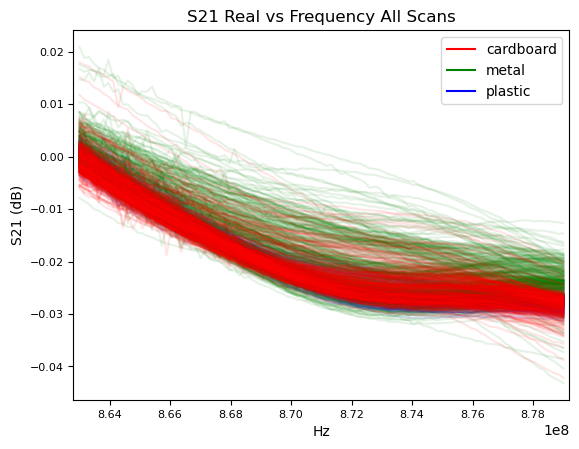

In [46]:
fig = plt.figure()
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=8)
plot.tick_params(axis='both', which='minor', labelsize=6)

for file in plastic_data:
    plt.plot(file[:, 0], file[:, 3], 'b', alpha = 0.1)#:

for file in metal_data:
    plt.plot(file[:, 0], file[:, 3], 'g', alpha = 0.1)#-

for file in cardboard_data:
    plt.plot(file[:, 0], file[:, 3], 'r', alpha = 0.1)#s

#plot single points to add legend
plt.plot(0, 0, 'r', label = "cardboard")
plt.plot(0, 0, 'g', label = "metal")
plt.plot(0, 0, 'b', label = "plastic")

ax = plt.gca()
ax.legend()
ax.set_xlim([862800000, 879200000])

plt.xlabel("Hz")
plt.ylabel("S21 (dB)")
plt.title("S21 Real vs Frequency All Scans")
#plt.savefig("Graphs/All_S21R.png")
plt.show()

### S21 complex

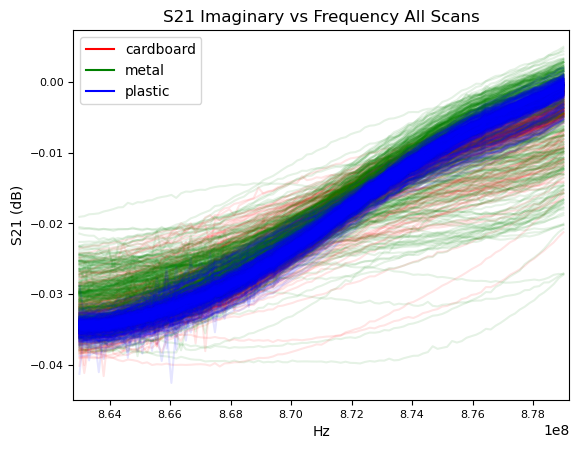

In [48]:
fig = plt.figure()
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=8)
plot.tick_params(axis='both', which='minor', labelsize=6)

for file in cardboard_data:
    plt.plot(file[:, 0], file[:, 4], 'r', alpha = 0.1)#s
for file in metal_data:
    plt.plot(file[:, 0], file[:, 4], 'g', alpha = 0.1)#-
for file in plastic_data:
    plt.plot(file[:, 0], file[:, 4], 'b', alpha = 0.1)#:

#plot single points to add legend
plt.plot(0, 0, 'r', label = "cardboard")
plt.plot(0, 0, 'g', label = "metal")
plt.plot(0, 0, 'b', label = "plastic")

ax = plt.gca()
ax.legend()
ax.set_xlim([862800000, 879200000])

plt.xlabel("Hz")
plt.ylabel("S21 (dB)")
plt.title("S21 Imaginary vs Frequency All Scans")
plt.savefig("Graphs/All_S21I.png")
plt.show()

# Outlier Demo

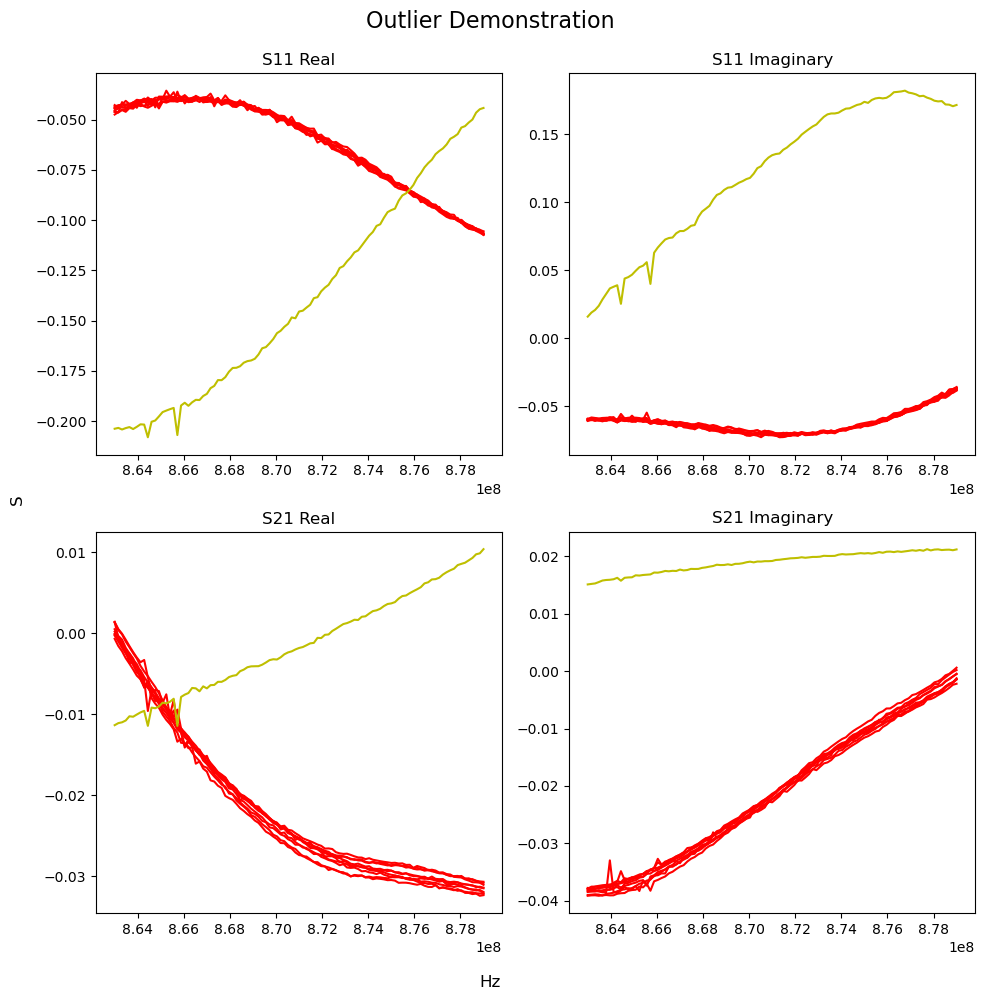

In [50]:
#Show the outlier value against other values measured from the same object
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
for j in range(4):
    plot = fig.add_subplot(2,2,j+1)
    match j:
        case 0:
            plt.title("S11 Real")
        case 1:
            plt.title("S11 Imaginary")
        case 2:
            plt.title("S21 Real")
        case 3:
            plt.title("S21 Imaginary")
    for i in range(c_scans[0]):
        plt.plot(cardboard_data[i,:, 0], cardboard_data[i,:, j+1], 'r')#s
    plt.plot(outlier[:,0], outlier[:, j+1], 'y')

fig.suptitle("Outlier Demonstration", fontsize=16, y=0.99)
fig.supxlabel("Hz")
fig.supylabel("S")
plt.tight_layout()
plt.savefig("graphs/outlier_demonstration.png")
plt.show()


### Antenna S11 parameter curves
Plot the S11 curves of each antenna over the measurement frequency range. Plots shown using dB scale for easier analysis.

In [58]:
antenna1_path = "test/Antenna 1 S11.s1p" 
antenna2_path = "test/Antenna 2 S11.s1p"

#remove the metadata row
antenna1 = np.loadtxt(antenna1_path, skiprows = 1)
antenna2 = np.loadtxt(antenna2_path, skiprows = 1)

#Convert to db_scale
antenna1_mag = [np.sqrt(x**2 + y**2) for x, y in antenna1[:,1:3]]
antenna2_mag = [np.sqrt(x**2 + y**2) for x, y in antenna2[:,1:3]]

antenna1_dB = [20*np.log10(x) for x in antenna1_mag]
antenna2_dB = [20*np.log10(x) for x in antenna2_mag]

In [174]:
#Find maximum and minimum values in data for visualization purposes
max_index1 = np.argmax(antenna1_dB)
max_x = antenna1[max_index1][0]
max_y = antenna1_dB[max_index1]

print(max_index1)
print(max_x)
print(max_y)

min_index1 = np.argmin(antenna1_dB)
min_x = antenna1[min_index1][0]
min_y = antenna1_dB[min_index1]

print(min_index1)
print(min_x)
print(min_y)

100
879000000.0
-17.12598104453346
1
863160000.0
-19.569178799123044


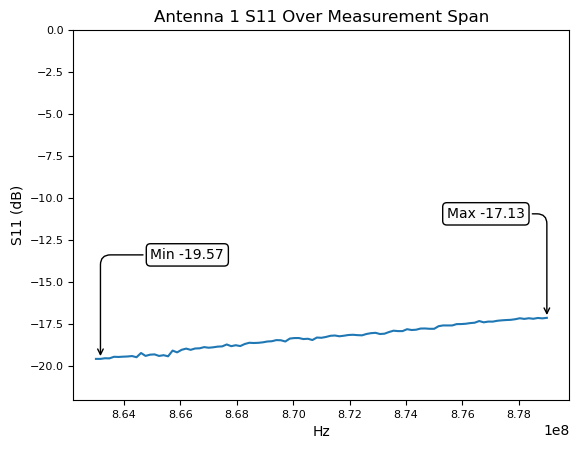

In [176]:
#Plot antenna 1 S11 graph
fig = plt.figure()
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=8)
plot.tick_params(axis='both', which='minor', labelsize=6)

plt.plot(antenna1[:,0], antenna1_dB)

ax = plt.gca()
ax.set_ylim([-22, 0])

bbox = dict(boxstyle="round", fc="0.99")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate(f'Max {max_y:.2f}',
    (max_x, max_y),
    xytext=(-1*offset, offset), textcoords='offset points',
    bbox=bbox, arrowprops=arrowprops)

ax.annotate(f'Min {min_y:.2f}',
    xy=(min_x, min_y),
    xytext=(0.5*offset, offset), textcoords='offset points',
    bbox=bbox, arrowprops=arrowprops)

#Set labels and title, save the figure and show
plt.xlabel("Hz")
plt.ylabel("S11 (dB)")
plt.title("Antenna 1 S11 Over Measurement Span")
plt.savefig("Graphs/Antenna 1 S11 dB.png")
plt.show()

In [178]:
#Find maximum and minimum values in data for visualization purposes
max_index2 = np.argmax(antenna2_dB)
max_x = antenna2[max_index2][0]
max_y = antenna2_dB[max_index2]

print(max_index2)
print(max_x)
print(max_y)

min_index2 = np.argmin(antenna2_dB)
min_x = antenna2[min_index2][0]
min_y = antenna2_dB[min_index2]

print(min_index2)
print(min_x)
print(min_y)

1
863160000.0
-17.323238997287564
61
872760000.0
-18.462528723469042


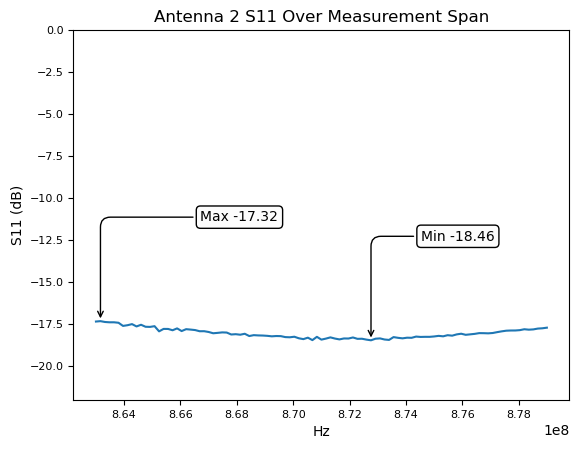

In [180]:
#Plot antenna 2 S11 graph
fig = plt.figure()
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=8)
plot.tick_params(axis='both', which='minor', labelsize=6)

#plt.plot(file[:, 0], file[:, 1], 'b', alpha = 0.1)#:
plt.plot(antenna2[:,0], antenna2_dB)
#plt.plot(0, 0, 'r', label = "cardboard")
#plt.plot(0, 0, 'g', label = "metal")
#plt.plot(0, 0, 'b', label = "plastic")


ax = plt.gca()
#ax.legend()
ax.set_ylim([-22, 0])

bbox = dict(boxstyle="round", fc="0.99")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

offset = 72
ax.annotate(f'Max {max_y:.2f}',
    (max_x, max_y),
    xytext=(offset, offset), textcoords='offset points',
    bbox=bbox, arrowprops=arrowprops)

ax.annotate(f'Min {min_y:.2f}',
    xy=(min_x, min_y),
    xytext=(0.5*offset, offset), textcoords='offset points',
    bbox=bbox, arrowprops=arrowprops)

#Set labels and title, save the figure and show
plt.xlabel("Hz")
plt.ylabel("S11 (dB)")
plt.title("Antenna 2 S11 Over Measurement Span")
plt.savefig("Graphs/Antenna2 S11 dB.png")
plt.show()